# Audio: Memuat Data & Visualisasi

Audio adalah sinyal satu dimensi yang mengandung informasi temporal. Dalam kehidupan sehari-hari, kita menemukan aplikasi audio di berbagai bidang seperti:
- Industri musik dan multimedia
- Automatic Speech Recognition (ASR)
- Bioacoustics untuk analisis suara hewan
- Sistem keamanan dengan deteksi suara

## Tujuan Akhir Sesi:

- **Memuat berkas audio** (WAV/MP3) dan memeriksa metadatanya
- **Memvisualisasikan waveform** untuk memahami struktur temporal audio
- **Memutar audio** langsung di dalam notebook Jupyter
- **Membuat spectrogram** menggunakan STFT dan konversi log-dB
- **Membuat Mel-spectrogram & MFCC** untuk analisis spektral lanjutan

**Catatan:** Jika file MP3 tidak dapat terbaca, gunakan format WAV sebagai alternatif.

In [8]:
# Setup & Instalasi - Pastikan semua paket terinstal (opsional), disarankan untuk diinstal dari terminal
# !pip install -q librosa soundfile numpy scipy matplotlib ipython

# Import semua library yang dibutuhkan
import librosa
import soundfile as sf
import numpy as np
import scipy
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

# Tampilkan versi pustaka untuk memastikan kompatibilitas
print("Versi pustaka yang digunakan:")
print(f"Librosa: {librosa.__version__}")
print(f"NumPy: {np.__version__}")
print(f"SciPy: {scipy.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print("✅ Semua pustaka berhasil dimuat!")

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.10 from "c:\Users\hp\multimedia\.venv\Scripts\python.exe"
  * The NumPy version is: "2.2.6"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


## Data & Opsi Sumber Audio

Dalam tutorial ini, kita akan menggunakan 3 opsi sumber audio yang fleksibel:

1. **Berkas lokal** - Gunakan file audio yang sudah ada di direktori `data/` (PATH_AUDIO)
2. **Contoh bawaan librosa** - Jika file lokal tidak tersedia, gunakan sample audio dari librosa
3. **Sinyal sinus sederhana** - Jika kedua opsi di atas gagal, buat sinyal sinus buatan

**Keuntungan pendekatan ini:** Semua langkah pembelajaran tetap dapat berjalan tanpa tergantung pada ketersediaan file audio tertentu. Anda dapat mengganti `PATH_AUDIO` dengan file audio favorit Anda!

In [2]:
# Memuat Audio dengan Sistem Fallback
PATH_AUDIO = os.path.join(os.getcwd(), 'data', 'artorias.wav')

# Variabel untuk menyimpan hasil
y = None
sr = None
source_info = ""

# Opsi 1: Coba muat file lokal
try:
    if os.path.exists(PATH_AUDIO):
        y, sr = librosa.load(PATH_AUDIO, sr=None)  # sr=None untuk mempertahankan sample rate asli
        source_info = f"✅ Berhasil memuat: {PATH_AUDIO}"
    else:
        raise FileNotFoundError("File tidak ditemukan")
except:
    print(f"⚠️ Tidak dapat memuat {PATH_AUDIO}")
    
    # Opsi 2: Gunakan contoh bawaan librosa
    try:
        y, sr = librosa.load(librosa.ex('trumpet'), sr=None)
        source_info = "✅ Menggunakan contoh audio bawaan librosa (trumpet)"
    except:
        print("⚠️ Contoh librosa tidak tersedia")

# Konversi ke mono jika stereo
if y.ndim > 1:
    y = np.mean(y, axis=0)  # Rata-rata semua kanal
    source_info += " - Dikonversi ke mono"

# Pastikan tipe data float32 untuk efisiensi
y = y.astype(np.float32)

print(source_info)
print(f"📊 Shape data: {y.shape}")
print(f"🎵 Sample rate: {sr} Hz")

✅ Berhasil memuat: /Users/martinmanullang/Developer/if4021-handson/data/artorias.wav
📊 Shape data: (1740800,)
🎵 Sample rate: 44100 Hz


## Memeriksa Metadata Dasar

Sebelum menganalisis audio, penting untuk memahami karakteristik dasar file audio:

- **Sample Rate (Hz)**: Jumlah sampel per detik. Semakin tinggi, semakin baik kualitas tetapi file semakin besar
- **Durasi (detik)**: Panjang total audio dalam satuan waktu
- **Jumlah Kanal**: Mono (1 kanal) atau Stereo (2 kanal)
- **Range Amplitudo**: Biasanya dinormalisasi antara -1.0 hingga 1.0

**Tip Praktis:** Saat bekerja dengan dataset audio, pastikan semua file memiliki sample rate yang sama untuk konsistensi pemrosesan.

In [3]:
# Analisis Metadata Audio
print("📋 METADATA AUDIO")
print("=" * 40)
print(f"🔢 Jumlah sampel: {len(y):,}")
print(f"🎵 Sample rate: {sr:,} Hz")
print(f"⏱️ Durasi: {len(y)/sr:.2f} detik")
print(f"📻 Jumlah kanal: {'Mono (1 kanal)' if y.ndim == 1 else f'Multi-kanal ({y.ndim} kanal)'}")
print(f"📊 Tipe data: {y.dtype}")
print()
print("📈 STATISTIK AMPLITUDO")
print("=" * 40)
print(f"🔽 Nilai minimum: {np.min(y):.4f}")
print(f"🔼 Nilai maksimum: {np.max(y):.4f}")
print(f"📊 Nilai rata-rata: {np.mean(y):.4f}")
print(f"📏 Standar deviasi: {np.std(y):.4f}")

# Cek apakah audio terlalu keras (clipping)
if np.abs(y).max() >= 0.99:
    print("⚠️ PERINGATAN: Audio mungkin mengalami clipping (terlalu keras)")
else:
    print("✅ Audio dalam range amplitudo yang sehat")

📋 METADATA AUDIO
🔢 Jumlah sampel: 1,740,800
🎵 Sample rate: 44,100 Hz
⏱️ Durasi: 39.47 detik
📻 Jumlah kanal: Mono (1 kanal)
📊 Tipe data: float32

📈 STATISTIK AMPLITUDO
🔽 Nilai minimum: -1.0000
🔼 Nilai maksimum: 1.0000
📊 Nilai rata-rata: -0.0002
📏 Standar deviasi: 0.2175
⚠️ PERINGATAN: Audio mungkin mengalami clipping (terlalu keras)


## Visualisasi Waveform

**Waveform** adalah representasi visual dari sinyal audio dalam domain waktu:

- **Sumbu X (horizontal)**: Waktu dalam detik
- **Sumbu Y (vertikal)**: Amplitudo (biasanya -1.0 hingga 1.0)

**Cara membaca waveform:**
- Area dengan amplitudo besar = suara keras/intens
- Area dengan amplitudo kecil = suara pelan/sunyi
- Pola berulang = nada dengan frekuensi tertentu
- Area datar (amplitudo ~0) = keheningan

/var/folders/h3/797kn0gx025b0p9fs3f_c2yw0000gn/T/ipykernel_9417/773066823.py:39: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h3/797kn0gx025b0p9fs3f_c2yw0000gn/T/ipykernel_9417/773066823.py:39: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/martinmanullang/Developer/if4021-handson/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/martinmanullang/Developer/if4021-handson/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/martinmanullang/Developer/if4021-handson/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Gl

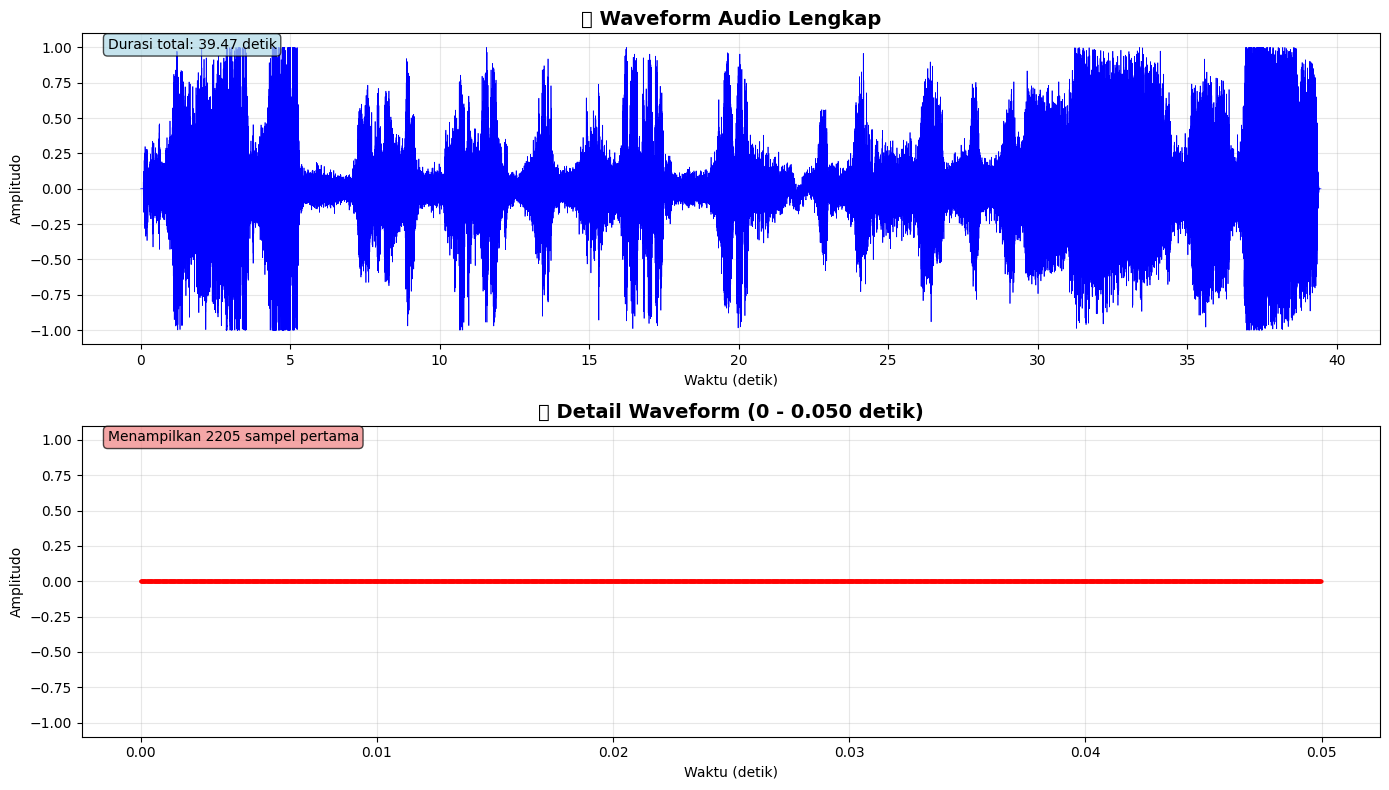

✅ Waveform berhasil ditampilkan!
📊 Total sampel yang diplot: 1,740,800
🔍 Sampel zoom detail: 2205


In [4]:
# Plot Waveform dengan Detail Zoom
# Buat vektor waktu
t = np.linspace(0, len(y)/sr, len(y))

# Setup plot dengan 2 subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Waveform lengkap
ax1.plot(t, y, color='blue', linewidth=0.5)
ax1.set_title('🎵 Waveform Audio Lengkap', fontsize=14, fontweight='bold')
ax1.set_xlabel('Waktu (detik)')
ax1.set_ylabel('Amplitudo')
ax1.grid(True, alpha=0.3)
ax1.set_ylim([-1.1, 1.1])

# Tambahkan informasi durasi
duration_text = f'Durasi total: {len(y)/sr:.2f} detik'
ax1.text(0.02, 0.95, duration_text, transform=ax1.transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

# Plot 2: Zoom detail 0-0.05 detik (atau maksimal 10% dari durasi total)
zoom_duration = min(0.05, (len(y)/sr) * 0.1)
zoom_samples = int(zoom_duration * sr)
t_zoom = t[:zoom_samples]
y_zoom = y[:zoom_samples]

ax2.plot(t_zoom, y_zoom, color='red', linewidth=1.5, marker='o', markersize=2)
ax2.set_title(f'🔍 Detail Waveform (0 - {zoom_duration:.3f} detik)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Waktu (detik)')
ax2.set_ylabel('Amplitudo')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([-1.1, 1.1])

# Tambahkan informasi zoom
zoom_text = f'Menampilkan {zoom_samples} sampel pertama'
ax2.text(0.02, 0.95, zoom_text, transform=ax2.transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))

plt.tight_layout()
plt.show()

print(f"✅ Waveform berhasil ditampilkan!")
print(f"📊 Total sampel yang diplot: {len(y):,}")
print(f"🔍 Sampel zoom detail: {zoom_samples}")

## Memutar Audio di Notebook

Jupyter Notebook memungkinkan kita memutar audio secara langsung menggunakan `IPython.display.Audio`. Ini sangat berguna untuk:

- **Verifikasi** bahwa audio telah dimuat dengan benar
- **Mendengar** hasil pemrosesan audio
- **Membandingkan** audio sebelum dan sesudah modifikasi

⚠️ **PERINGATAN VOLUME**: Pastikan volume speaker/headphone tidak terlalu keras sebelum memutar audio!

In [5]:
# Memutar Audio di Notebook
print("🔊 Audio Player - Pastikan volume tidak terlalu keras!")
print(f"🎵 Durasi: {len(y)/sr:.2f} detik")
print(f"📻 Sample rate: {sr} Hz")
print("▶️ Klik tombol play di bawah untuk mendengar audio:")

# Tampilkan audio player
Audio(y, rate=sr)

🔊 Audio Player - Pastikan volume tidak terlalu keras!
🎵 Durasi: 39.47 detik
📻 Sample rate: 44100 Hz
▶️ Klik tombol play di bawah untuk mendengar audio:


## Spectrogram (STFT)

**Short-Time Fourier Transform (STFT)** mengubah sinyal audio dari domain waktu ke domain frekuensi-waktu:

- **Sumbu X**: Waktu (detik)
- **Sumbu Y**: Frekuensi (Hz)  
- **Warna/Intensitas**: Magnitude (kekuatan frekuensi)

**Mengapa log-dB?** 
Persepsi manusia terhadap suara bersifat logaritmik. Konversi ke decibel (dB) membuat visualisasi lebih sesuai dengan cara kita mendengar.

**Kegunaan Spectrogram:**
- Analisis harmoni dan overtone musik
- Deteksi pola frekuensi dalam speech
- Identifikasi noise dan gangguan audio

/var/folders/h3/797kn0gx025b0p9fs3f_c2yw0000gn/T/ipykernel_9417/2400879995.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/martinmanullang/Developer/if4021-handson/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/martinmanullang/Developer/if4021-handson/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


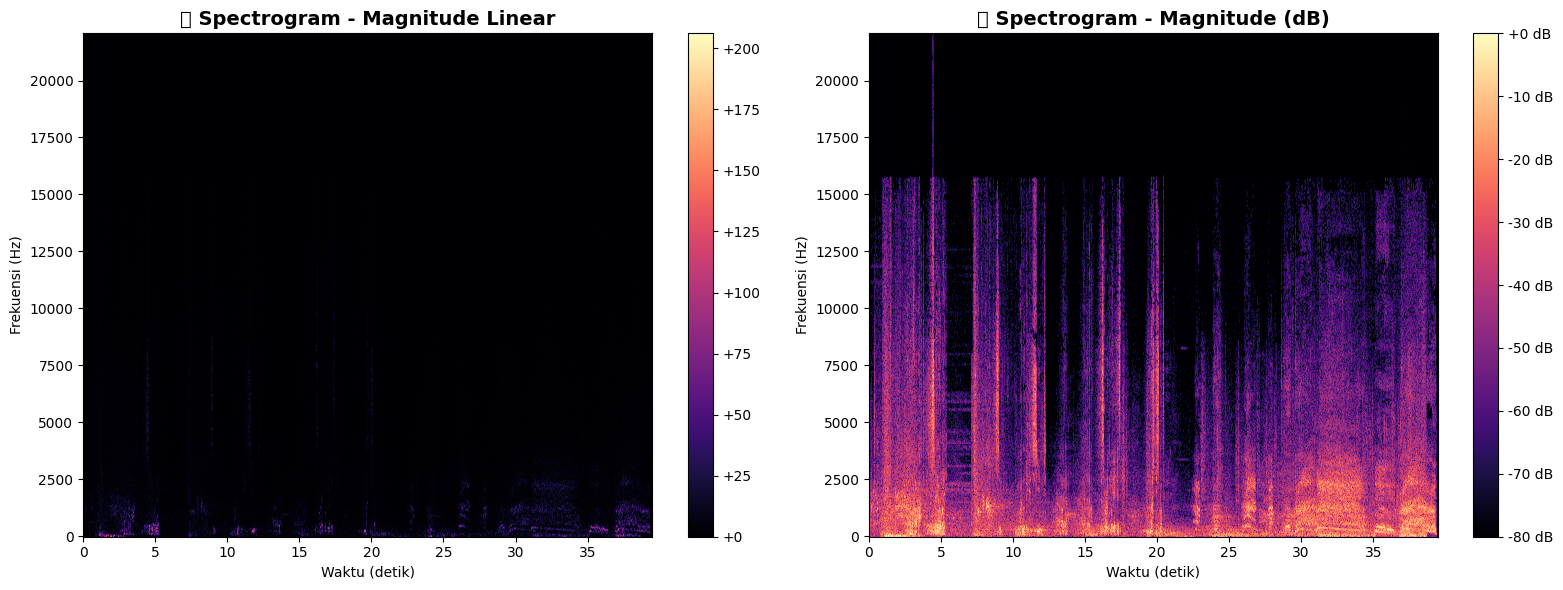

📋 INFORMASI STFT
🔢 Ukuran FFT: 1024
👣 Hop length: 256
🪟 Window function: hann
📊 Shape magnitude: (513, 6801)
⏱️ Resolusi waktu: 5.8 ms per frame
🎵 Resolusi frekuensi: 43.1 Hz per bin
📈 Range magnitude (dB): -80.0 - 0.0


In [6]:
# Hitung dan Plot Spectrogram (STFT)
# Parameter STFT
n_fft = 1024        # Ukuran FFT window
hop_length = 256    # Langkah antar frame
window = 'hann'     # Jenis window function

# Hitung STFT
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window=window)
magnitude = np.abs(D)
magnitude_db = librosa.amplitude_to_db(magnitude, ref=np.max)

# Setup plot dengan 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Magnitude Spectrogram (Linear)
img1 = librosa.display.specshow(magnitude, x_axis='time', y_axis='hz', 
                               sr=sr, hop_length=hop_length, ax=ax1)
ax1.set_title('📊 Spectrogram - Magnitude Linear', fontsize=14, fontweight='bold')
ax1.set_xlabel('Waktu (detik)')
ax1.set_ylabel('Frekuensi (Hz)')
plt.colorbar(img1, ax=ax1, format='%+2.0f')

# Plot 2: Magnitude Spectrogram (Log dB)
img2 = librosa.display.specshow(magnitude_db, x_axis='time', y_axis='hz',
                               sr=sr, hop_length=hop_length, ax=ax2)
ax2.set_title('📊 Spectrogram - Magnitude (dB)', fontsize=14, fontweight='bold')  
ax2.set_xlabel('Waktu (detik)')
ax2.set_ylabel('Frekuensi (Hz)')
plt.colorbar(img2, ax=ax2, format='%+2.0f dB')

plt.tight_layout()
plt.show()

# Informasi STFT
print("📋 INFORMASI STFT")
print("=" * 40)
print(f"🔢 Ukuran FFT: {n_fft}")
print(f"👣 Hop length: {hop_length}")
print(f"🪟 Window function: {window}")
print(f"📊 Shape magnitude: {magnitude.shape}")
print(f"⏱️ Resolusi waktu: {hop_length/sr*1000:.1f} ms per frame")
print(f"🎵 Resolusi frekuensi: {sr/n_fft:.1f} Hz per bin")
print(f"📈 Range magnitude (dB): {magnitude_db.min():.1f} - {magnitude_db.max():.1f}")

## Mel-Spectrogram & MFCC

### Mel-Spectrogram
**Skala Mel** adalah skala frekuensi yang lebih sesuai dengan persepsi pendengaran manusia:
- Frekuensi rendah mendapat resolusi yang lebih tinggi
- Frekuensi tinggi dikompresi (resolusi lebih rendah)
- Formula: `mel = 2595 * log10(1 + f/700)`

### MFCC (Mel-Frequency Cepstral Coefficients)
**MFCC** adalah ringkasan spektral yang sangat populer dalam:
- **Speech Recognition** - fitur utama untuk ASR
- **Music Information Retrieval** - analisis timbre dan genre
- **Audio Classification** - identifikasi jenis suara

Biasanya menggunakan **13 koefisien pertama** yang mengandung informasi spektral paling penting.

/var/folders/h3/797kn0gx025b0p9fs3f_c2yw0000gn/T/ipykernel_9417/4280952748.py:34: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/h3/797kn0gx025b0p9fs3f_c2yw0000gn/T/ipykernel_9417/4280952748.py:34: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/martinmanullang/Developer/if4021-handson/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/martinmanullang/Developer/if4021-handson/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/martinmanullang/Developer/if4021-handson/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIR

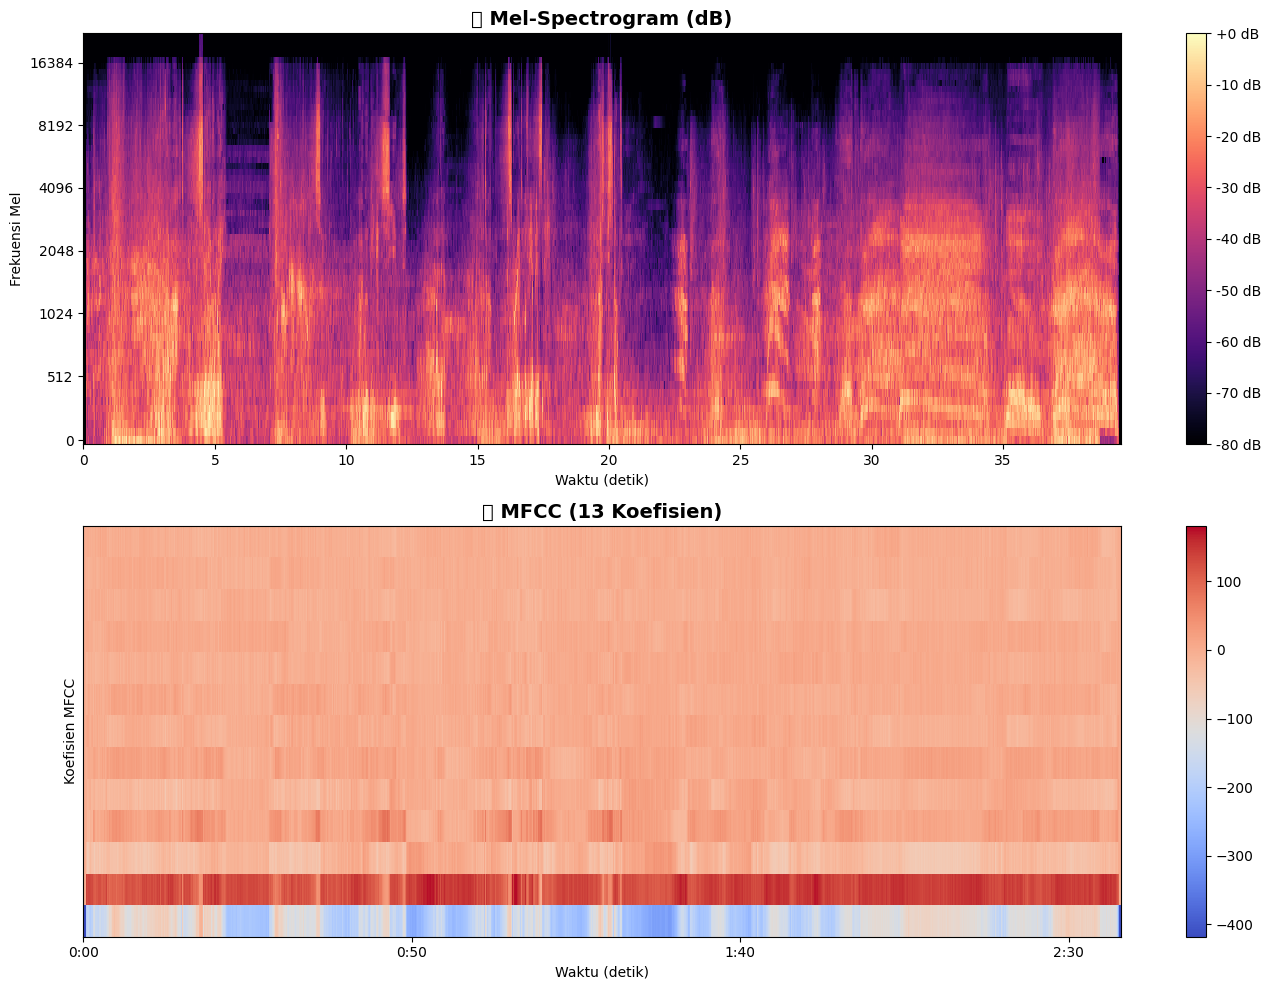

📋 INFORMASI MEL-SPECTROGRAM & MFCC
🎶 Jumlah Mel bins: 64
🎯 Jumlah MFCC: 13
📊 Shape Mel-spectrogram: (64, 6801)
📊 Shape MFCC: (13, 6801)
📈 Range Mel-spectrogram (dB): -80.0 - 0.0
📈 Range MFCC: -417.98 - 180.79

✅ Semua fitur spektral berhasil dihitung!
🎵 Mel-spectrogram: Representasi frekuensi sesuai persepsi manusia
🎯 MFCC: Ringkasan spektral untuk machine learning


In [7]:
# Hitung Mel-Spectrogram dan MFCC
# Parameter untuk Mel-spectrogram
n_mels = 64  # Jumlah mel bins
fmax = sr // 2  # Frekuensi maksimum (Nyquist frequency)

# Hitung Mel-spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, 
                                         hop_length=hop_length, n_mels=n_mels, fmax=fmax)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Hitung MFCC (13 koefisien)
n_mfcc = 13
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, 
                           hop_length=hop_length, n_mels=n_mels)

# Setup plot dengan 2 subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Mel-Spectrogram
img1 = librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel',
                               sr=sr, hop_length=hop_length, fmax=fmax, ax=ax1)
ax1.set_title('🎶 Mel-Spectrogram (dB)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Waktu (detik)')
ax1.set_ylabel('Frekuensi Mel')
plt.colorbar(img1, ax=ax1, format='%+2.0f dB')

# Plot 2: MFCC (Heatmap)
img2 = librosa.display.specshow(mfcc, x_axis='time', ax=ax2)
ax2.set_title('🎯 MFCC (13 Koefisien)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Waktu (detik)')
ax2.set_ylabel('Koefisien MFCC')
plt.colorbar(img2, ax=ax2)

plt.tight_layout()
plt.show()

# Informasi Mel & MFCC
print("📋 INFORMASI MEL-SPECTROGRAM & MFCC")
print("=" * 50)
print(f"🎶 Jumlah Mel bins: {n_mels}")
print(f"🎯 Jumlah MFCC: {n_mfcc}")
print(f"📊 Shape Mel-spectrogram: {mel_spec.shape}")
print(f"📊 Shape MFCC: {mfcc.shape}")
print(f"📈 Range Mel-spectrogram (dB): {mel_spec_db.min():.1f} - {mel_spec_db.max():.1f}")
print(f"📈 Range MFCC: {mfcc.min():.2f} - {mfcc.max():.2f}")
print()
print("✅ Semua fitur spektral berhasil dihitung!")
print("🎵 Mel-spectrogram: Representasi frekuensi sesuai persepsi manusia")
print("🎯 MFCC: Ringkasan spektral untuk machine learning")